In [5]:
import pandas as pd
import numpy as np
import random 
import os
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import duckdb
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드 및 확인

In [6]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [8]:
train.head()

,ID,gender,age,height,weight,cholesterol,systolic_blood_pressure,diastolic_blood_pressure,glucose,bone_density,activity,smoke_status,medical_history,family_medical_history,sleep_pattern,edu_level,mean_working,stress_score
0,TRAIN_0000,F,72,161.49,58.47,279.84,165,100,143.35,0.87,moderate,ex-smoker,high blood pressure,diabetes,sleep difficulty,bachelors degree,NaN,0.63
1,TRAIN_0001,M,88,179.87,77.60,257.37,178,111,146.94,0.07,moderate,ex-smoker,NaN,diabetes,normal,graduate degree,NaN,0.83
2,TRAIN_0002,M,47,182.47,89.93,226.66,134,95,142.61,1.18,light,ex-smoker,NaN,NaN,normal,high school diploma,9.0,0.70
3,TRAIN_0003,M,69,185.78,68.63,206.74,158,92,137.26,0.48,intense,ex-smoker,high blood pressure,NaN,oversleeping,graduate degree,NaN,0.17
4,TRAIN_0004,F,81,164.63,71.53,255.92,171,116,129.37,0.34,moderate,ex-smoker,diabetes,diabetes,sleep difficulty,bachelors degree,NaN,0.36


In [9]:
test.head()

,ID,gender,age,height,weight,cholesterol,systolic_blood_pressure,diastolic_blood_pressure,glucose,bone_density,activity,smoke_status,medical_history,family_medical_history,sleep_pattern,edu_level,mean_working
0,TEST_0000,F,72,161.95,77.66,312.36,137,112,131.16,0.51,moderate,current-smoker,high blood pressure,heart disease,oversleeping,graduate degree,NaN
1,TEST_0001,F,84,152.35,58.70,269.54,162,95,129.36,0.51,intense,current-smoker,NaN,NaN,normal,graduate degree,NaN
2,TEST_0002,F,45,164.09,76.71,209.08,146,91,169.21,1.13,light,ex-smoker,diabetes,heart disease,sleep difficulty,bachelors degree,6.0
3,TEST_0003,M,58,165.06,76.34,246.52,146,98,133.78,0.52,light,current-smoker,heart disease,heart disease,sleep difficulty,high school diploma,10.0
4,TEST_0004,F,35,158.17,65.60,181.24,142,80,73.93,1.42,moderate,ex-smoker,diabetes,heart disease,oversleeping,NaN,7.0


# EDA 및 전처리 

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        3000 non-null   object 
 1   gender                    3000 non-null   object 
 2   age                       3000 non-null   int64  
 3   height                    3000 non-null   float64
 4   weight                    3000 non-null   float64
 5   cholesterol               3000 non-null   float64
 6   systolic_blood_pressure   3000 non-null   int64  
 7   diastolic_blood_pressure  3000 non-null   int64  
 8   glucose                   3000 non-null   float64
 9   bone_density              3000 non-null   float64
 10  activity                  3000 non-null   object 
 11  smoke_status              3000 non-null   object 
 12  medical_history           1711 non-null   object 
 13  family_medical_history    1514 non-null   object 
 14  sleep_pa

In [11]:
train.describe()

,age,height,weight,cholesterol,systolic_blood_pressure,diastolic_blood_pressure,glucose,bone_density,mean_working,stress_score
count,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,1968.000000,3000.000000
mean,53.06800,168.585687,72.486680,233.910523,146.144333,95.504000,126.467720,0.933367,8.716972,0.482130
std,20.67207,9.351876,13.167222,24.333434,15.845310,9.895283,18.536844,0.444783,1.628944,0.288252
min,17.00000,141.130000,36.320000,148.810000,97.000000,60.000000,70.050000,-0.220000,4.000000,0.000000
25%,35.00000,161.800000,63.035000,216.927500,135.000000,89.000000,113.912500,0.560000,8.000000,0.230000
50%,53.00000,168.115000,71.240000,234.255000,146.000000,95.000000,126.555000,0.940000,9.000000,0.480000
75%,72.00000,175.352500,81.832500,250.377500,158.000000,102.000000,139.180000,1.300000,10.000000,0.730000
max,89.00000,195.280000,120.880000,313.350000,191.000000,124.000000,185.740000,2.000000,16.000000,1.000000


In [12]:
train.value_counts()

ID          gender  age  height  weight  cholesterol  systolic_blood_pressure  diastolic_blood_pressure  glucose  bone_density  activity  smoke_status    medical_history      family_medical_history  sleep_pattern     edu_level            mean_working  stress_score
TRAIN_0012  F       32   160.00  69.84   216.29       124                      100                       114.40   1.36          moderate  ex-smoker       high blood pressure  high blood pressure     sleep difficulty  graduate degree      8.0           0.59            1
TRAIN_0025  F       39   163.05  94.85   223.32       155                      92                        135.58   0.87          moderate  ex-smoker       high blood pressure  high blood pressure     normal            bachelors degree     9.0           0.54            1
TRAIN_0026  M       53   170.80  83.19   228.00       162                      89                        149.90   0.87          moderate  current-smoker  high blood pressure  diabetes            

In [13]:
train.isna().sum()

ID                             0
gender                         0
age                            0
height                         0
weight                         0
cholesterol                    0
systolic_blood_pressure        0
diastolic_blood_pressure       0
glucose                        0
bone_density                   0
activity                       0
smoke_status                   0
medical_history             1289
family_medical_history      1486
sleep_pattern                  0
edu_level                    607
mean_working                1032
stress_score                   0
dtype: int64

In [14]:
print(train['gender'].unique())
print(train['activity'].unique())
print(train['smoke_status'].unique())
print(train['medical_history'].unique())# 따로 보기
print(train['family_medical_history'].unique()) # 따로 보기
print(train['sleep_pattern'].unique())
print(train['edu_level'].unique())


['F' 'M']
['moderate' 'light' 'intense']
['ex-smoker' 'non-smoker' 'current-smoker']
['high blood pressure' nan 'diabetes' 'heart disease']
['diabetes' nan 'high blood pressure' 'heart disease']
['sleep difficulty' 'normal' 'oversleeping']
['bachelors degree' 'graduate degree' 'high school diploma' nan]


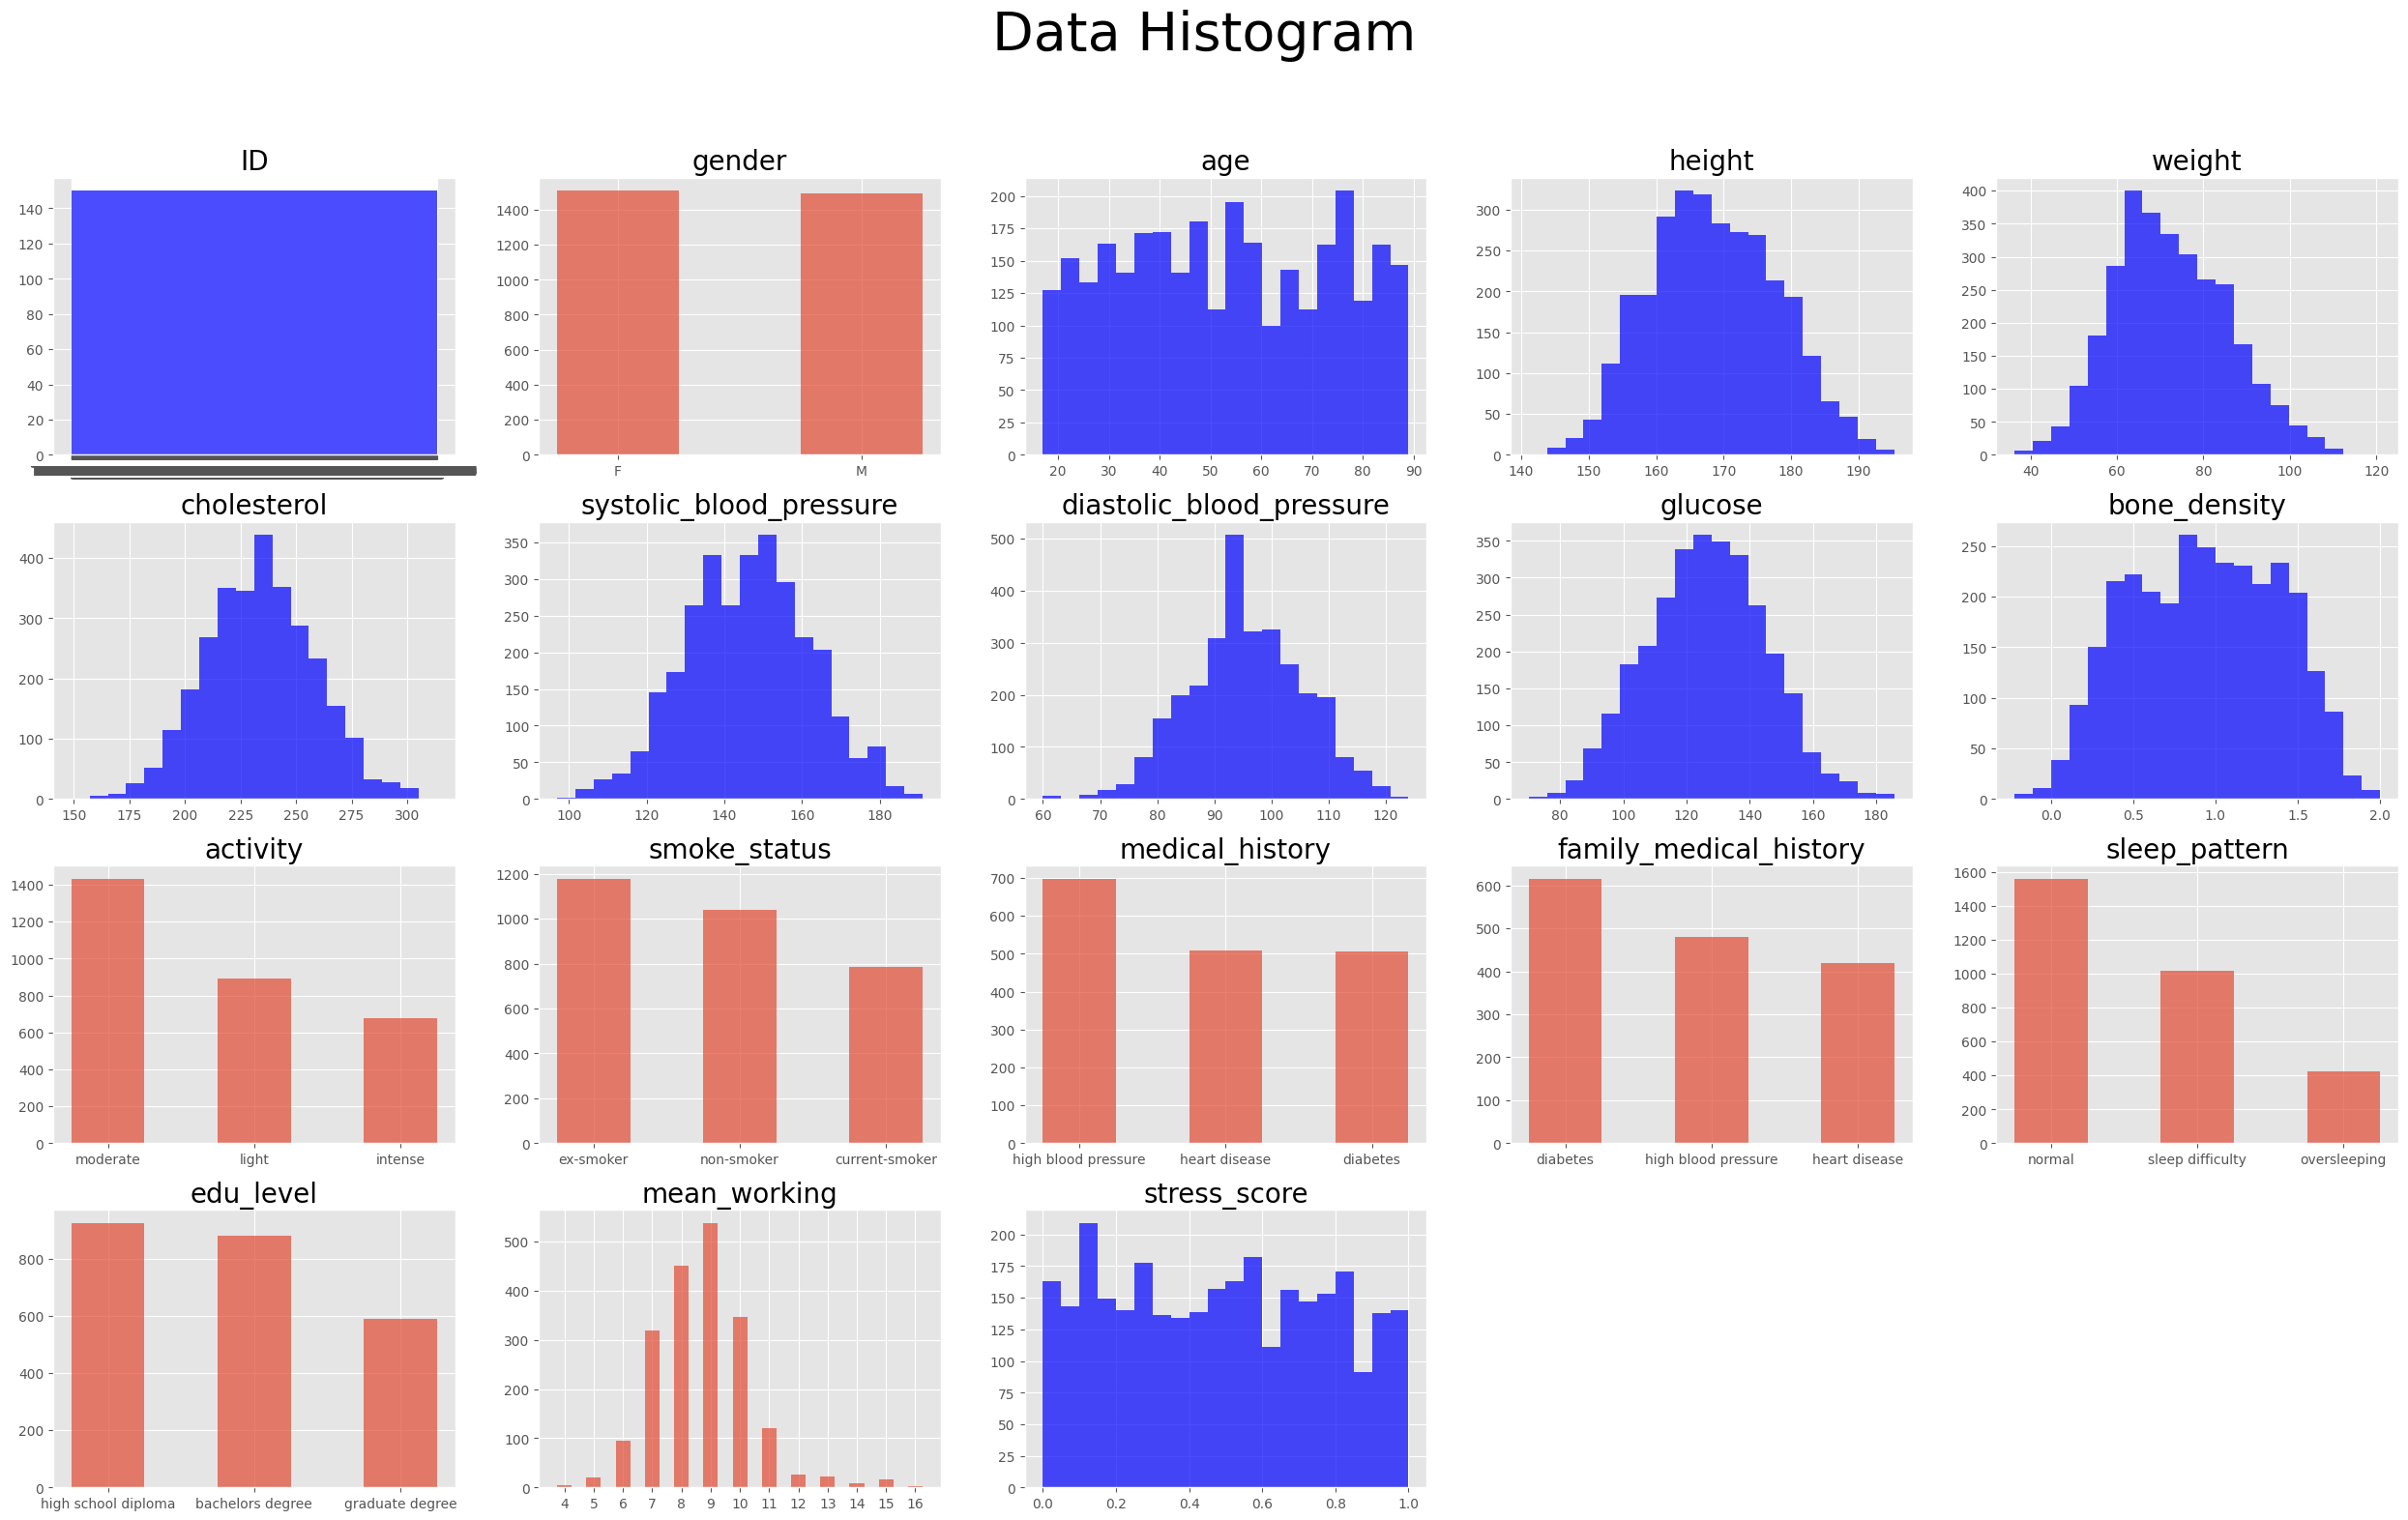

In [15]:
plt.style.use("ggplot")

# 히스토그램을 사용해서 데이터의 분포를 살펴봅니다.
plt.figure(figsize=(25,20))
plt.suptitle("Data Histogram", fontsize=40)

# id는 제외하고 시각화합니다.
cols = train.columns
for i in range(len(cols)):
    plt.subplot(5,5,i+1)
    plt.title(cols[i], fontsize=20)
    if len(train[cols[i]].unique()) > 20:
        plt.hist(train[cols[i]], bins=20, color='b', alpha=0.7)
    else:
        temp = train[cols[i]].value_counts()
        plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
        plt.xticks(temp.keys())
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

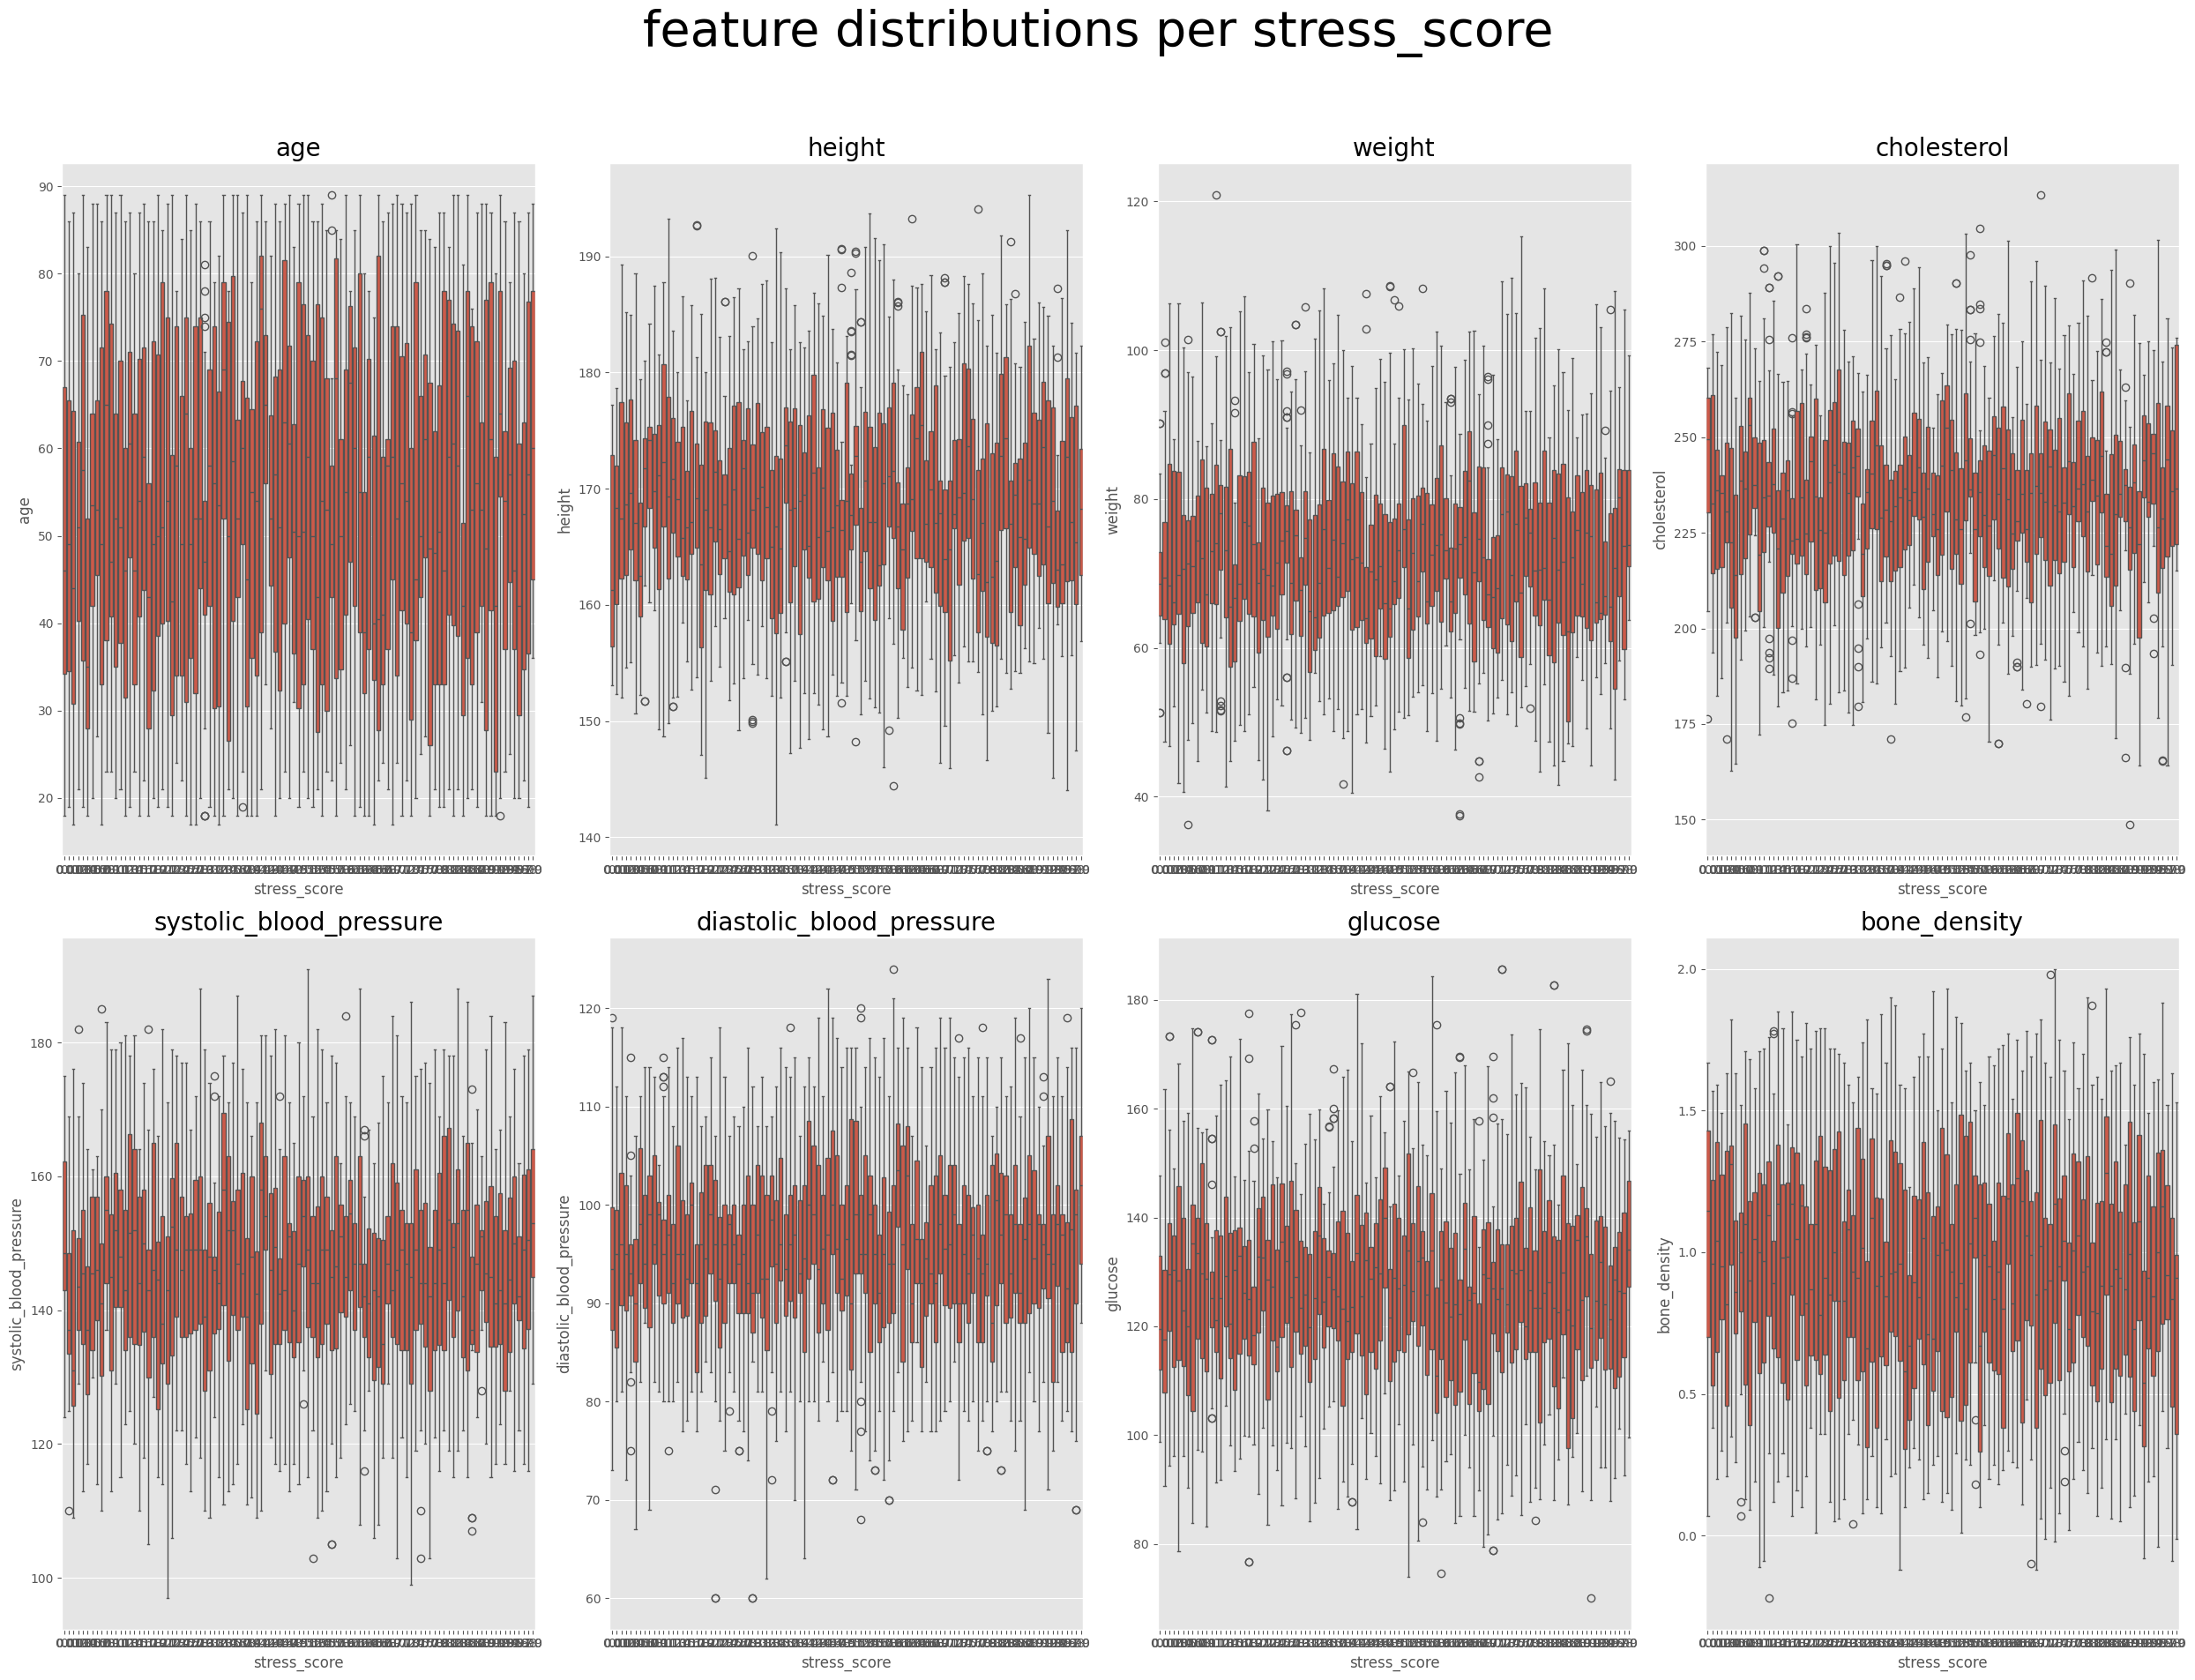

In [16]:
# 수치형 데이터 분리
numeric_feature = train.columns[(train.dtypes=='int64') | (train.dtypes=='float')]
num_data = train[numeric_feature]

# 박스플롯

fig, axes = plt.subplots(2, 4, figsize=(25, 20))

fig.suptitle('feature distributions per stress_score', fontsize= 40)
for ax, col in zip(axes.flat, num_data.columns[:-1]):
    sns.boxplot(x= 'stress_score', y= col, ax=ax, data=num_data)
    ax.set_title(col, fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [17]:
# 데이터 속성 따라 분리하기
# Data columns (total 18 columns):
#  #   Column                    Non-Null Count  Dtype  
# ---  ------                    --------------  -----  
#  0   ID                        3000 non-null   object 
#  1   gender                    3000 non-null   object 
#  2   age                       3000 non-null   int64  
#  3   height                    3000 non-null   float64
#  4   weight                    3000 non-null   float64
#  5   cholesterol               3000 non-null   float64
#  6   systolic_blood_pressure   3000 non-null   int64  
#  7   diastolic_blood_pressure  3000 non-null   int64  
#  8   glucose                   3000 non-null   float64
#  9   bone_density              3000 non-null   float64
#  10  activity                  3000 non-null   object 
#  11  smoke_status              3000 non-null   object 
#  12  medical_history           1711 non-null   object 
#  13  family_medical_history    1514 non-null   object 
#  14  sleep_pattern             3000 non-null   object 
#  15  edu_level                 2393 non-null   object 
#  16  mean_working              1968 non-null   float64
#  17  stress_score              3000 non-null   float64

# 2. 순서형 변수
ordinal_feature = ['activity','smoke_status','sleep_pattern','edu_level']

# 3. 범주형 변수
categorical_feature = ['medical_history','family_medical_history']

#  1. 수치형 변수
numeric_feature = [cols for cols in train.columns if cols not in ordinal_feature and cols not in categorical_feature]
numeric_feature.remove('ID') # ID 제거
numeric_feature.remove('stress_score')
print(len(ordinal_feature))
print(len(categorical_feature))
print(numeric_feature)


4
2
['gender', 'age', 'height', 'weight', 'cholesterol', 'systolic_blood_pressure', 'diastolic_blood_pressure', 'glucose', 'bone_density', 'mean_working']


In [18]:
query = """
SELECT 
  CASE gender
    WHEN 'M' THEN 0
    WHEN 'F' THEN 1
    ELSE NULL
  END AS gender,
  age,
  height,
  weight,
  cholesterol,
  systolic_blood_pressure,
  diastolic_blood_pressure,
  glucose,
  bone_density,
  CASE activity
    WHEN 'moderate' THEN 0
    WHEN 'light' THEN 1
    WHEN 'intense' THEN 2
    ELSE NULL
  END AS activity,
  CASE smoke_status
    WHEN 'non-smoker' THEN 0
    WHEN 'ex-smoker' THEN 1
    WHEN 'current-smoker' THEN 2
    ELSE NULL
  END AS smoke_status,
  medical_history,
  family_medical_history,
  CASE sleep_pattern
    WHEN 'normal' THEN 0
    WHEN 'oversleeping' THEN 1
    WHEN 'sleep difficulty' THEN 2
    ELSE null
  END AS sleep_pattern,
  CASE edu_level
    WHEN 'high school diploma' THEN 1
    WHEN 'graduate degree' THEN 2
    WHEN 'bachelors degree' THEN 3
    ELSE 0
  END AS edu_level,
  CASE WHEN mean_working IS NULL THEN 0 ELSE mean_working END AS mean_working,  -- null 이면 일 안하는사람이겠지
  stress_score
FROM train
"""
train_EDA = duckdb.query(query).to_df()

In [19]:
# 범주형 결측치 처리 아마 병이 없는 사람일 가능성이 높으니까 없다 로 해봐야겠다
train_EDA['medical_history'] = train_EDA['medical_history'].fillna('Never')
train_EDA['family_medical_history'] = train_EDA['family_medical_history'].fillna('Never')

In [20]:
print(train_EDA.isna().sum())
train_EDA.head()

gender                      0
age                         0
height                      0
weight                      0
cholesterol                 0
systolic_blood_pressure     0
diastolic_blood_pressure    0
glucose                     0
bone_density                0
activity                    0
smoke_status                0
medical_history             0
family_medical_history      0
sleep_pattern               0
edu_level                   0
mean_working                0
stress_score                0
dtype: int64


,gender,age,height,weight,cholesterol,systolic_blood_pressure,diastolic_blood_pressure,glucose,bone_density,activity,smoke_status,medical_history,family_medical_history,sleep_pattern,edu_level,mean_working,stress_score
0,1,72,161.49,58.47,279.84,165,100,143.35,0.87,0,1,high blood pressure,diabetes,2,3,0.0,0.63
1,0,88,179.87,77.60,257.37,178,111,146.94,0.07,0,1,Never,diabetes,0,2,0.0,0.83
2,0,47,182.47,89.93,226.66,134,95,142.61,1.18,1,1,Never,Never,0,1,9.0,0.70
3,0,69,185.78,68.63,206.74,158,92,137.26,0.48,2,1,high blood pressure,Never,1,2,0.0,0.17
4,1,81,164.63,71.53,255.92,171,116,129.37,0.34,0,1,diabetes,diabetes,2,3,0.0,0.36


In [21]:
#test에도 똑같이 해주자

query = """
SELECT 
  CASE gender
    WHEN 'M' THEN 0
    WHEN 'F' THEN 1
    ELSE NULL
  END AS gender,
  age,
  height,
  weight,
  cholesterol,
  systolic_blood_pressure,
  diastolic_blood_pressure,
  glucose,
  bone_density,
  CASE activity
    WHEN 'moderate' THEN 0
    WHEN 'light' THEN 1
    WHEN 'intense' THEN 2
    ELSE NULL
  END AS activity,
  CASE smoke_status
    WHEN 'non-smoker' THEN 0
    WHEN 'ex-smoker' THEN 1
    WHEN 'current-smoker' THEN 2
    ELSE NULL
  END AS smoke_status,
  medical_history,
  family_medical_history,
  CASE sleep_pattern
    WHEN 'normal' THEN 0
    WHEN 'oversleeping' THEN 1
    WHEN 'sleep difficulty' THEN 2
    ELSE null
  END AS sleep_pattern,
  CASE edu_level
    WHEN 'high school diploma' THEN 1
    WHEN 'graduate degree' THEN 2
    WHEN 'bachelors degree' THEN 3
    ELSE 0
  END AS edu_level,
  CASE WHEN mean_working IS NULL THEN 0 ELSE mean_working END AS mean_working,  -- 이건 그대로!
  FROM test
"""
test_EDA = duckdb.query(query).to_df()


In [22]:
# 범주형 결측치 처리 아마 병이 없는 사람일 가능성이 높으니까 없다 로 해봐야겠다
test_EDA['medical_history'] = test_EDA['medical_history'].fillna('Never')
test_EDA['family_medical_history'] = test_EDA['family_medical_history'].fillna('Never')

In [23]:
print(test_EDA.isna().sum())
test_EDA.head()

gender                      0
age                         0
height                      0
weight                      0
cholesterol                 0
systolic_blood_pressure     0
diastolic_blood_pressure    0
glucose                     0
bone_density                0
activity                    0
smoke_status                0
medical_history             0
family_medical_history      0
sleep_pattern               0
edu_level                   0
mean_working                0
dtype: int64


,gender,age,height,weight,cholesterol,systolic_blood_pressure,diastolic_blood_pressure,glucose,bone_density,activity,smoke_status,medical_history,family_medical_history,sleep_pattern,edu_level,mean_working
0,1,72,161.95,77.66,312.36,137,112,131.16,0.51,0,2,high blood pressure,heart disease,1,2,0.0
1,1,84,152.35,58.70,269.54,162,95,129.36,0.51,2,2,Never,Never,0,2,0.0
2,1,45,164.09,76.71,209.08,146,91,169.21,1.13,1,1,diabetes,heart disease,2,3,6.0
3,0,58,165.06,76.34,246.52,146,98,133.78,0.52,1,2,heart disease,heart disease,2,1,10.0
4,1,35,158.17,65.60,181.24,142,80,73.93,1.42,0,1,diabetes,heart disease,1,0,7.0


# 모델링

In [24]:
# 데이터 스플릿 진행
x_train = train_EDA.copy() 
y_train = train_EDA.iloc[:, -1].copy() 
x_test = test_EDA.copy()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(3000, 17)
(3000,)
(3000, 16)


In [25]:
# 수치형에는 robust - scaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

x_train_scaled = x_train.copy()
x_train_scaled[numeric_feature] = scaler.fit_transform(x_train[numeric_feature])
x_test_scaled = x_test.copy()
x_test_scaled[numeric_feature] = scaler.transform(x_test[numeric_feature])


print("Scaled x_train:\n", x_train_scaled)
print("\nScaled x_test:\n", x_test_scaled)

Scaled x_train:
       gender       age    height    weight  cholesterol  \
0        0.0  0.513514 -0.488840 -0.679346     1.362780   
1       -1.0  0.945946  0.867368  0.338343     0.691031   
2       -1.0 -0.162162  1.059214  0.994281    -0.227055   
3       -1.0  0.432432  1.303450 -0.138848    -0.822571   
4        0.0  0.756757 -0.257148  0.015428     0.647683   
...      ...       ...       ...       ...          ...   
2995     0.0  0.918919  0.465966  0.313872    -0.028251   
2996    -1.0 -0.756757  0.245342 -1.041096    -1.117040   
2997     0.0  0.027027 -0.441616 -0.835217    -0.709567   
2998    -1.0  0.459459  0.974359  0.583056    -0.004634   
2999    -1.0  0.891892  0.837115 -0.102673     0.609118   

      systolic_blood_pressure  diastolic_blood_pressure   glucose  \
0                    0.826087                  0.384615  0.664688   
1                    1.391304                  1.230769  0.806768   
2                   -0.521739                  0.000000  0.635401  

In [26]:
# 범주형 인코딩딩
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded_train = encoder.fit_transform(x_train_scaled[categorical_feature])
encoded_test = encoder.transform(x_test_scaled[categorical_feature])

x_train_scaled = x_train_scaled.drop(columns=categorical_feature)
x_test_scaled = x_test_scaled.drop(columns=categorical_feature)

# 데이터프레임으로 변환환
encoded_train_df = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(categorical_feature))
encoded_test_df = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(categorical_feature))

# 합치기
x_train_final = pd.concat([x_train_scaled, encoded_train_df], axis=1)
x_test_final = pd.concat([x_test_scaled, encoded_test_df], axis=1)

In [27]:
# 최종 확인
x_train_final.head()

# 왜 stress_score 가 들어가있는진 모르겠지만 drop 해야지
x_train_final = x_train_final.drop('stress_score', axis=1)

print(x_train_final.shape)

(3000, 22)


In [28]:
x_test_final.head()

,gender,age,height,weight,cholesterol,systolic_blood_pressure,diastolic_blood_pressure,glucose,bone_density,activity,...,edu_level,mean_working,medical_history_Never,medical_history_diabetes,medical_history_heart disease,medical_history_high blood pressure,family_medical_history_Never,family_medical_history_diabetes,family_medical_history_heart disease,family_medical_history_high blood pressure
0,0.0,0.513514,-0.454898,0.341535,2.334978,-0.391304,1.307692,0.182250,-0.581081,0,...,2,-0.888889,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.837838,-1.163254,-0.667110,1.054858,0.695652,0.000000,0.111012,-0.581081,2,...,2,-0.888889,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,-0.216216,-0.296993,0.290996,-0.752616,0.000000,-0.307692,1.688137,0.256757,1,...,3,-0.222222,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-1.0,0.135135,-0.225420,0.271313,0.366667,0.000000,0.230769,0.285940,-0.567568,1,...,1,0.222222,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,-0.486486,-0.733813,-0.300040,-1.584903,-0.173913,-1.153846,-2.082715,0.648649,0,...,0,-0.111111,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [29]:
x_test_final.head()

,gender,age,height,weight,cholesterol,systolic_blood_pressure,diastolic_blood_pressure,glucose,bone_density,activity,...,edu_level,mean_working,medical_history_Never,medical_history_diabetes,medical_history_heart disease,medical_history_high blood pressure,family_medical_history_Never,family_medical_history_diabetes,family_medical_history_heart disease,family_medical_history_high blood pressure
0,0.0,0.513514,-0.454898,0.341535,2.334978,-0.391304,1.307692,0.182250,-0.581081,0,...,2,-0.888889,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.837838,-1.163254,-0.667110,1.054858,0.695652,0.000000,0.111012,-0.581081,2,...,2,-0.888889,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,-0.216216,-0.296993,0.290996,-0.752616,0.000000,-0.307692,1.688137,0.256757,1,...,3,-0.222222,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-1.0,0.135135,-0.225420,0.271313,0.366667,0.000000,0.230769,0.285940,-0.567568,1,...,1,0.222222,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,-0.486486,-0.733813,-0.300040,-1.584903,-0.173913,-1.153846,-2.082715,0.648649,0,...,0,-0.111111,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# 모델링

In [34]:
from lightgbm import LGBMRegressor

params = {
    'n_estimators': 500,
    'learning_rate': 0.05,
    'num_leaves': 31,
    'max_depth': -1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'min_child_samples': 20,
    'objective': 'regression',
    'metric': 'mae',
    'random_state': 42,
    'device': 'gpu'  # GPU 사용 설정 (또는 'cuda' for CUDA)
}

lgbr = LGBMRegressor(**params)

lgbr.fit(x_train_final, y_train)

pred = lgbr.predict(x_test_final)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1464
[LightGBM] [Info] Number of data points in the train set: 3000, number of used features: 22
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4070 Ti, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 16 dense feature groups (0.05 MB) transferred to GPU in 0.000973 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.482130


In [35]:
submission = pd.read_csv('../data/sample_submission.csv')

submission['stress_score'] = pred

submission.to_csv('submission.csv', index=False)
